# <B><font size="+5" align="center"> Loan Amortization Project </font>

## Project Overview
This project focuses on analyzing loan data and generating detailed amortization schedules. By calculating periodic principal and interest payments, we can understand the cash flow patterns for each loan and analyze the impact of different payment frequencies and optional prepayments.

## Objectives
1. Load and preprocess loan data.
2. Perform exploratory data analysis (EDA) to understand loan characteristics.
3. Generate amortization schedules for each loan, including the effects of prepayments.
4. Consolidate all loan schedules into a single cash flow summary.
5. Visualize key patterns and summarize insights.

## <font size="+2" align="center">Importing Necessary Libraries & Data Loading and Preprocessing</font>



### Step 1.1 : Importing Libraries and Data Loading
We'll import libraries for data manipulation, numerical calculations, and visualization. Also import data from excel sheet which given dataset.

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


# Load the datasets
file_path_1 = '/content/ModifiedAmortization Test.xlsx'  # Replace with the correct path in Google Colab
file_path_2 = '/content/SimpleAmortizationTest.xlsx'

# Read the Excel files
modified_amortization_data = pd.ExcelFile(file_path_1)
simple_amortization_data = pd.ExcelFile(file_path_2)

# Display sheet names to understand the structure of the files
print("Modified Amortization Sheets:", modified_amortization_data.sheet_names)
print("Simple Amortization Sheets:", simple_amortization_data.sheet_names)

# Load the primary data sheets for each file
modified_loan_tape = modified_amortization_data.parse('LoanTape')
simple_loan_data = simple_amortization_data.parse('LoanDataTape')

# Display the first few rows of each data sheet to understand structure
print("Modified Loan Tape Data Sample:")
display(modified_loan_tape.head())
print(end="\n")
print("Simple Loan Data Sample:")
display(simple_loan_data.head())


Modified Amortization Sheets: ['LoanTape', 'STEP 1', 'STEP 2', 'STEP 3']
Simple Amortization Sheets: ['LoanDataTape', 'Task Details']
Modified Loan Tape Data Sample:


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,start_date,original_principal,amortization_term_months,mortgage_term_months,interest_rate,compounding_frequency,payment_frequency,cpr
0,2024-01-13,10000,360,12,0.05,Monthly,Monthly,0.05
1,2024-01-14,12000,360,24,0.05,Monthly,Weekly,0.05
2,2024-01-15,13000,360,36,0.05,Monthly,Bi-Weekly,0.05
3,2024-01-16,14000,360,48,0.05,Monthly,Semi-Monthly,0.05
4,2024-01-17,10000,360,60,0.05,Monthly,Monthly,0.05



Simple Loan Data Sample:


,loan number,loan amount,interest_rate,start_date,term,payment frequency,CPR (Conditional Prepayment Rate)
0,int,float,float: (annual rate),date,float (months),str,float
1,1,35000,0.08,2023-09-01 00:00:00,36,Monthly,0.05
2,2,40000,0.08,2023-10-01 00:00:00,12,Monthly,0.05
3,3,40000,0.08,2023-11-01 00:00:00,48,Monthly,0.05
4,4,40000,0.08,2023-12-01 00:00:00,60,Monthly,0.05


In [ ]:
# Display dataset column names and data types for Modified Loan Tape
print("Modified Loan Tape Columns and Types:")
print(modified_loan_tape.dtypes)

# Display dataset column names and data types for Simple Loan Data
print("\nSimple Loan Data Columns and Types:")
print(simple_loan_data.dtypes)

# Document key variables (example based on hypothetical data)
key_columns = {
    "loan_id": "Unique identifier for each loan",
    "original_principal": "Initial loan amount",
    "interest_rate": "Annual interest rate in decimal form",
    "term_months": "Duration of the loan in months",
    "payment_frequency": "Payment frequency (Monthly, Bi-Weekly, Weekly)",
    "prepayment_amount": "Optional prepayment amount"
}

print("\nKey Variable Descriptions:")
for col, desc in key_columns.items():
    print(f"{col}: {desc}")


Modified Loan Tape Columns and Types:
start_date                  datetime64[ns]
original_principal                   int64
amortization_term_months             int64
mortgage_term_months                 int64
interest_rate                      float64
compounding_frequency               object
payment_frequency                   object
cpr                                float64
dtype: object

Simple Loan Data Columns and Types:
loan number                          object
loan amount                          object
interest_rate                        object
start_date                           object
term                                 object
payment frequency                    object
CPR (Conditional Prepayment Rate)    object
dtype: object

Key Variable Descriptions:
loan_id: Unique identifier for each loan
original_principal: Initial loan amount
interest_rate: Annual interest rate in decimal form
term_months: Duration of the loan in months
payment_frequency: Payment frequency (Mo

## Understanding the Loan Amortization Data

This project analyzes loan amortization data from two Excel sheets: **ModifiedAmortization** and **SimpleAmortizationTest**.

### 1. ModifiedAmortization

**Purpose:** This sheet contains the primary loan data, including a detailed amortization schedule with potential modifications or adjustments.

**Key Columns:**

*   `loan_id`: Unique identifier for each loan.
*   `original_principal`: Initial loan amount.
*   `interest_rate`: Annual interest rate.
*   `term_months`: Loan duration in months.
*   `payment_frequency`: Frequency of payments (e.g., Monthly, Bi-Weekly).
*   *Additional columns may include prepayment rates or custom adjustments.*

### 2. SimpleAmortizationTest

**Purpose:** This sheet likely serves as a baseline or test dataset, potentially containing a simplified version of the data for verification and testing purposes.

**Key Columns:**

*   Similar to `ModifiedAmortization`, including `loan_id`, `original_principal`, `interest_rate`, `term_months`, and `payment_frequency`.
*   *May lack the complex or modified fields from `ModifiedAmortization`.*

### Potential Relationship and Purpose

*   **Verification:** `SimpleAmortizationTest` might be used to verify calculations or ensure consistency with `ModifiedAmortization`.
*   **Baseline Comparison:** `SimpleAmortizationTest` could represent baseline data, while `ModifiedAmortization` includes modifications.
*   **Debugging and Testing:** `SimpleAmortizationTest` can help identify issues by providing a cleaner dataset for testing.

### Key Takeaways for Data Analysis

*   **Both Sheets are Essential:** Together, these sheets provide a complete view of the amortization process.
*   **Data Comparison:** Compare key metrics (total payment, interest paid) between the sheets to understand the impact of modifications.
*   **Simpler Dataset for Testing:** Use `SimpleAmortizationTest` to ensure the accuracy of calculations in `ModifiedAmortization`.

### Step 1.2 : Initial Data Cleaning
We'll check for missing values, inconsistent data formats, and handle any issues.

In [ ]:
# Check for missing values in each dataset
print("Modified Loan Tape Missing Values:\n", modified_loan_tape.isnull().sum())
print("Simple Loan Data Missing Values:\n", simple_loan_data.isnull().sum())

# Example data cleaning: Fill missing values, if any, with appropriate placeholders
modified_loan_tape.fillna(0, inplace=True)
simple_loan_data.fillna(0, inplace=True)


Modified Loan Tape Missing Values:
 start_date                  0
original_principal          0
amortization_term_months    0
mortgage_term_months        0
interest_rate               0
compounding_frequency       0
payment_frequency           0
cpr                         0
dtype: int64
Simple Loan Data Missing Values:
 loan number                          0
loan amount                          0
interest_rate                        0
start_date                           0
term                                 0
payment frequency                    0
CPR (Conditional Prepayment Rate)    0
dtype: int64


## Exploratory Data Analysis (EDA)


The goal of this section is to understand the characteristics of the loans in each dataset, such as the distribution of loan amounts, interest rates, and terms. We will also examine relationships between variables, such as loan term and interest rate.

### Key Questions:
1. What are the most common loan amounts, and are there significant outliers?
2. How do interest rates vary across different loans, and are there any anomalies?
3. What is the relationship between loan term duration, interest rates, and loan amounts?
4. How does payment frequency impact loan amounts and interest accumulation?


### Fig 2.1. Loan Amount Distribution with Outliers  
Boxplots are used to visualize the spread and detect outliers in loan amounts.





Descriptive Statistics for Loan Amounts:
count       18.000000
mean     12000.000000
std       1608.799333
min      10000.000000
25%      10000.000000
50%      12000.000000
75%      13000.000000
max      14000.000000
Name: original_principal, dtype: float64


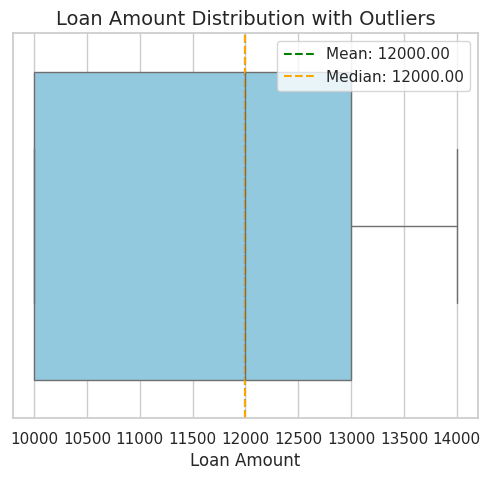

In [ ]:

# Setting a consistent aesthetic for plots
sns.set_theme(style="whitegrid")
# Calculate descriptive statistics for "original_principal"
loan_stats = modified_loan_tape["original_principal"].describe()

# Print the statistics
print("\nDescriptive Statistics for Loan Amounts:")
print(loan_stats)

# Enhanced Boxplot with Descriptive Statistics
plt.figure(figsize=(6, 5))
sns.boxplot(x=modified_loan_tape['original_principal'], color='skyblue')
plt.title('Loan Amount Distribution with Outliers', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)

# Annotating the boxplot with mean and median
mean_value = loan_stats['mean']
median_value = loan_stats['50%']
plt.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='orange', linestyle='--', label=f'Median: {median_value:.2f}')
plt.legend()

plt.show()


### Fig 2.2. Interest Rate Distribution with Outliers
Boxplots are also used to inspect the spread and detect outliers in interest rates.

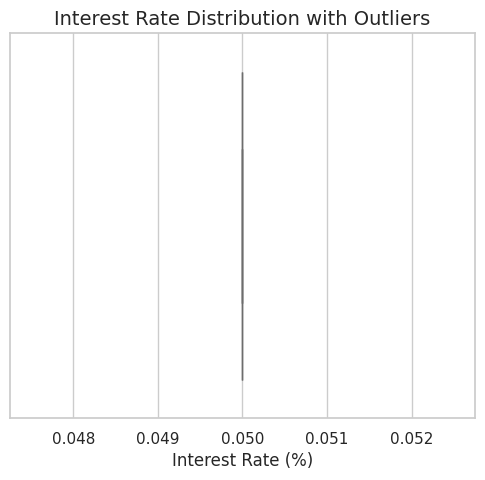

In [ ]:
# Boxplot to show interest rate distribution with potential outliers
plt.figure(figsize=(6, 5))
sns.boxplot(x=modified_loan_tape['interest_rate'], color='salmon')
plt.title('Interest Rate Distribution with Outliers', fontsize=14)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.show()


### Fig 2.3. Relationships Between Loan Attributes
Pairplots allow us to analyze relationships between multiple variables (e.g., loan amount, interest rate, and term length).

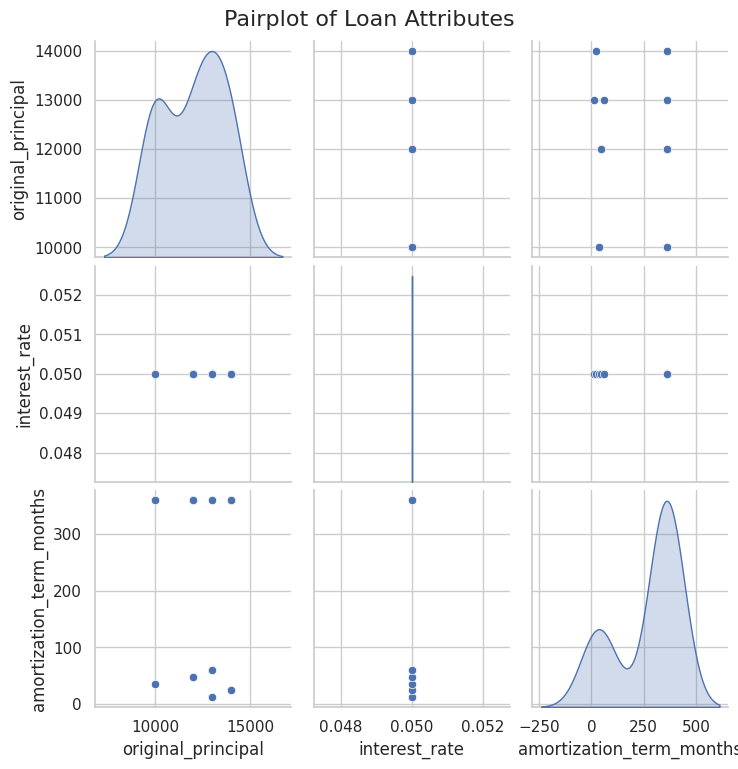

In [ ]:
# Pairplot to show relationships between loan attributes
sns.pairplot(modified_loan_tape[['original_principal', 'interest_rate', 'amortization_term_months']], diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Loan Attributes', y=1.02, fontsize=16)
plt.show()


### Fig 2.4. Correlation Heatmap
A heatmap is used to visualize correlations between numerical variables, helping identify strong or weak relationships.

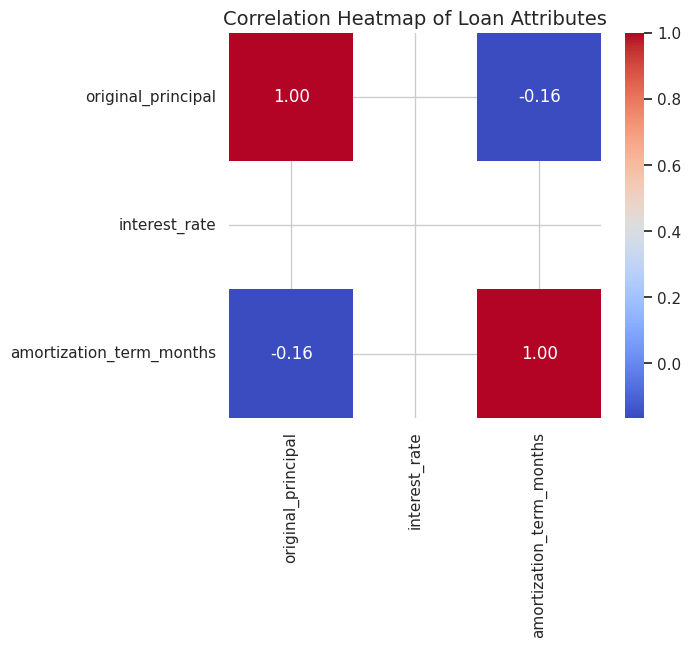

Index(['start_date', 'original_principal', 'amortization_term_months',
       'mortgage_term_months', 'interest_rate', 'compounding_frequency',
       'payment_frequency', 'cpr'],
      dtype='object')

In [ ]:
# Heatmap to visualize correlations
plt.figure(figsize=(6, 5))
correlation_matrix = modified_loan_tape[['original_principal', 'interest_rate', 'amortization_term_months']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Loan Attributes', fontsize=14)
plt.show()
modified_loan_tape.columns

### Fig 2.5. Loan Amounts by Payment Frequency
Violin plots show the distribution of loan amounts for each payment frequency, providing more detail than boxplots.

<ipython-input-14-10371252710f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='payment_frequency', y='original_principal', data=modified_loan_tape, palette='muted')


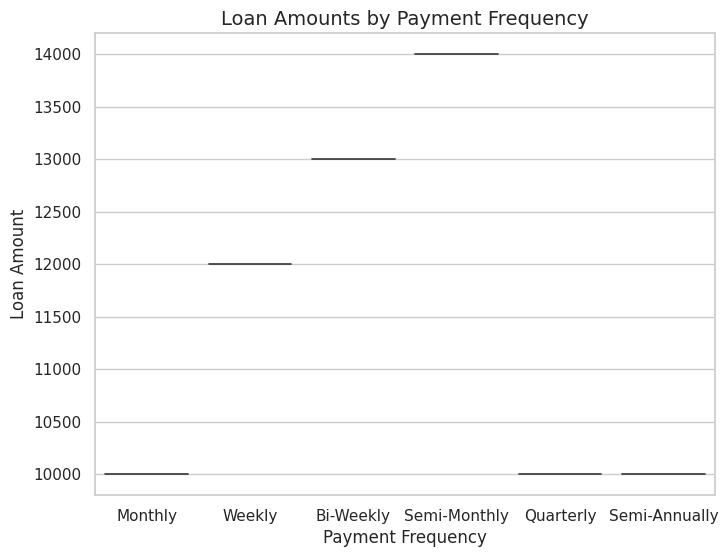

In [ ]:
# Violin plot for loan amounts by payment frequency
plt.figure(figsize=(8, 6))
sns.violinplot(x='payment_frequency', y='original_principal', data=modified_loan_tape, palette='muted')
plt.title('Loan Amounts by Payment Frequency', fontsize=14)
plt.xlabel('Payment Frequency', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.show()


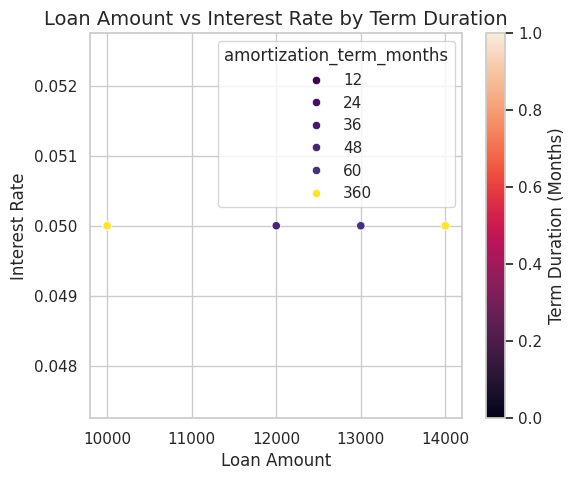

In [ ]:
# Scatter plot of loan amount vs. interest rate
plt.figure(figsize=(6, 5))
scatter = sns.scatterplot( # Assign the return value of sns.scatterplot to the variable 'scatter'
    x=modified_loan_tape["original_principal"],
    y=modified_loan_tape["interest_rate"],
    hue=modified_loan_tape["amortization_term_months"],
    palette="viridis"
)
plt.title('Loan Amount vs Interest Rate by Term Duration', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12)
# plt.colorbar(label="Term Duration (Months)")
plt.colorbar(scatter.collections[0], label="Term Duration (Months)") # Now 'scatter' is defined and can be used
plt.grid(True)
plt.show()

## Loan Amortization Schedule Generation

In this section, we will calculate the amortization schedule for each loan. This involves calculating periodic payments based on the loan amount, interest rate, term, and payment frequency. We'll also incorporate optional prepayments into the schedule.

#### Amortization Formula
For each payment period, the schedule will display:
- **Opening Balance**
- **Interest Payment**
- **Principal Repayment**
- **Optional Prepayment**
- **Closing Balance**

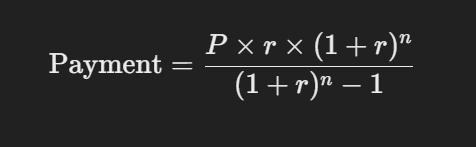



In [ ]:

# Dictionary for payment periods per year based on frequency
payment_periods_per_year = {
    "Monthly": 12,
    "Bi-Weekly": 26,
    "Weekly": 52,
    "Semi-Monthly": 24
}

def generate_amortization_schedule(principal, annual_interest_rate, term_months, payment_frequency, prepayment_rate=0.01, start_date=datetime(2024, 1, 1)):
    """
    Generate an amortization schedule for a loan.

    Parameters:
        principal (float): Initial loan amount.
        annual_interest_rate (float): Annual interest rate as a decimal.
        term_months (int): Loan term in months.
        payment_frequency (str): Payment frequency ('Monthly', 'Bi-Weekly', etc.).
        prepayment_rate (float): Prepayment rate as a decimal (default is 0.01 or 1%).
        start_date (datetime): Start date for the schedule.

    Returns:
        pd.DataFrame: Amortization schedule with columns for period details.
    """
    num_payments_per_year = payment_periods_per_year.get(payment_frequency, 12)
    periodic_interest_rate = annual_interest_rate / num_payments_per_year
    periods = term_months * (num_payments_per_year / 12)

    # Calculate periodic payment using the amortization formula
    if periodic_interest_rate > 0:
        payment = principal * (periodic_interest_rate / (1 - (1 + periodic_interest_rate) ** -periods))
    else:
        payment = principal / periods

    # Create amortization schedule
    schedule = []
    opening_balance = principal

    for period in range(1, int(periods) + 1):
        interest_payment = opening_balance * periodic_interest_rate
        principal_payment = payment - interest_payment
        prepayment = opening_balance * prepayment_rate if opening_balance > 0 else 0
        closing_balance = opening_balance - principal_payment - prepayment

        # Ensure no negative closing balance
        if closing_balance < 0:
            principal_payment += closing_balance
            closing_balance = 0

        schedule.append({
            "Period": period,
            "Date": start_date + timedelta(days=30 * period),
            "Opening Balance": opening_balance,
            "Principal Payment": principal_payment,
            "Interest Payment": interest_payment,
            "Prepayment": prepayment,
            "Total Payment": payment + prepayment,
            "Closing Balance": closing_balance
        })

        opening_balance = closing_balance
        if closing_balance <= 0:
            break

    return pd.DataFrame(schedule)

# Apply the function to a sample loan from the dataset for demonstration
sample_loan = modified_loan_tape.iloc[0]
sample_schedule = generate_amortization_schedule(
    principal=sample_loan['original_principal'],
    annual_interest_rate=sample_loan['interest_rate'],
    term_months=sample_loan['amortization_term_months'],
    payment_frequency=sample_loan['payment_frequency']
)
sample_schedule.head(10)  # Display the first 10 periods of the sample schedule


,Period,Date,Opening Balance,Principal Payment,Interest Payment,Prepayment,Total Payment,Closing Balance
0,1,2024-01-31,10000.000000,12.015496,41.666667,100.000000,153.682162,9887.984504
1,2,2024-03-01,9887.984504,12.482227,41.199935,98.879845,152.562007,9776.622432
2,3,2024-03-31,9776.622432,12.946235,40.735927,97.766224,151.448387,9665.909973
3,4,2024-04-30,9665.909973,13.407537,40.274625,96.659100,150.341262,9555.843335
4,5,2024-05-30,9555.843335,13.866148,39.816014,95.558433,149.240596,9446.418754
5,6,2024-06-29,9446.418754,14.322084,39.360078,94.464188,148.146350,9337.632482
6,7,2024-07-29,9337.632482,14.775360,38.906802,93.376325,147.058487,9229.480797
7,8,2024-08-28,9229.480797,15.225992,38.456170,92.294808,145.976970,9121.959997
8,9,2024-09-27,9121.959997,15.673996,38.008167,91.219600,144.901762,9015.066401
9,10,2024-10-27,9015.066401,16.119386,37.562777,90.150664,143.832826,8908.796351


## Consolidating Amortization Schedules

To get a complete view of cash flows across all loans, we will generate amortization schedules for each loan in the dataset and combine them into a single DataFrame. This allows us to summarize the total payments, principal, interest, and prepayments for all loans.

In [ ]:
def consolidate_schedules(modified_loan_tape, prepayment_rate=0.01, start_date=datetime(2024, 1, 1)):
    """
    Generate and consolidate amortization schedules for each loan in the modified_loan_tape.

    Parameters:
        modified_loan_tape (pd.DataFrame): DataFrame containing loan details.
        prepayment_rate (float): Prepayment rate for all loans.
        start_date (datetime): Global start date for all loans.

    Returns:
        pd.DataFrame: Consolidated amortization schedule aggregated by date.
    """
    loan_schedules = []
    for index, loan in modified_loan_tape.iterrows():
        loan_schedule = generate_amortization_schedule(
            principal=loan['original_principal'],
            annual_interest_rate=loan['interest_rate'],
            term_months=loan['amortization_term_months'],
            payment_frequency=loan['payment_frequency'],
            prepayment_rate=prepayment_rate,
            start_date=start_date
        )
        loan_schedule['Loan ID'] = index + 1
        loan_schedules.append(loan_schedule)

    consolidated_schedule_df = pd.concat(loan_schedules, ignore_index=True)

    # Aggregate by Date
    aggregated_schedule = consolidated_schedule_df.groupby('Date').agg({
        'Total Payment': 'sum',
        'Interest Payment': 'sum',
        'Principal Payment': 'sum',
        'Prepayment': 'sum',
        'Closing Balance': 'sum'
    }).reset_index()

    return aggregated_schedule

# Generate consolidated amortization schedule
aggregated_schedule = consolidate_schedules(modified_loan_tape, prepayment_rate=0.01)
print(aggregated_schedule.head())


        Date  Total Payment  Interest Payment  Principal Payment   Prepayment  \
0 2024-01-31    3946.434470        512.820513        1273.613957  2160.000000   
1 2024-03-01    3912.098331        504.540498        1281.893972  2125.663860   
2 2024-03-31    3878.022752        496.318991        1290.115479  2091.588282   
3 2024-04-30    3844.205715        488.155566        1298.278904  2057.771244   
4 2024-05-30    3810.645213        480.049803        1306.384667  2024.210743   

   Closing Balance  
0    212566.386043  
1    209158.828211  
2    205777.124449  
3    202421.074301  
4    199090.478891  


## Summary of Consolidated Cash Flows

Now, let's create a summary of the total payments, principal, interest, and prepayments made across all loans. This will give us an overview of the overall cash flows and the remaining balance.

In [ ]:
def summarize_consolidated_schedule(consolidated_schedule_df):
    """
    Summarize key metrics from the consolidated amortization schedule.

    Parameters:
        consolidated_schedule_df (pd.DataFrame): Consolidated amortization schedule.

    Returns:
        dict: Summary of total payments, interest, principal, and remaining balance.
    """
    total_payments_made = consolidated_schedule_df["Total Payment"].sum()
    total_interest_paid = consolidated_schedule_df["Interest Payment"].sum()
    total_principal_paid = consolidated_schedule_df["Principal Payment"].sum() + consolidated_schedule_df["Prepayment"].sum()
    remaining_balance = consolidated_schedule_df["Closing Balance"].iloc[-1]

    return {
        "Total Payments Made": total_payments_made,
        "Total Interest Paid": total_interest_paid,
        "Total Principal Paid": total_principal_paid,
        "Remaining Balance (Overall)": remaining_balance
    }

detailed_summary = summarize_consolidated_schedule(aggregated_schedule)
print("Summary of Consolidated Amortization Schedule:", detailed_summary)


Summary of Consolidated Amortization Schedule: {'Total Payments Made': 243081.18433762965, 'Total Interest Paid': 26638.247618926827, 'Total Principal Paid': 216000.00000000006, 'Remaining Balance (Overall)': 0.0}


In [ ]:
# Save aggregated schedule to CSV
aggregated_schedule.to_csv("Consolidated_Amortization_Schedule.csv", index=False)


In [ ]:
# Display sample data for verification
print("\nSample Rows from Modified Loan Tape:")
print(modified_loan_tape.head())

print("\nSample Rows from Aggregated Schedule:")
print(aggregated_schedule.head())


Sample Rows from Modified Loan Tape:
  start_date  original_principal  amortization_term_months  \
0 2024-01-13               10000                       360   
1 2024-01-14               12000                       360   
2 2024-01-15               13000                       360   
3 2024-01-16               14000                       360   
4 2024-01-17               10000                       360   

   mortgage_term_months  interest_rate compounding_frequency  \
0                    12           0.05               Monthly   
1                    24           0.05               Monthly   
2                    36           0.05               Monthly   
3                    48           0.05               Monthly   
4                    60           0.05               Monthly   

  payment_frequency   cpr  
0           Monthly  0.05  
1            Weekly  0.05  
2         Bi-Weekly  0.05  
3      Semi-Monthly  0.05  
4           Monthly  0.05  

Sample Rows from Aggregated Schedul

## Visualization of Loan Cash Flows


Visualizations can provide valuable insights into the amortization schedule by showing how principal, interest, and prepayments change over time.

- **Total Payments by Loan**: A bar chart showing total payments made on each loan.
- **Interest vs. Principal Payment Over Time**: Line plot showing the breakdown of interest and principal payments over time for a sample loan.


### Fig 6.1. Total Payments by Loan

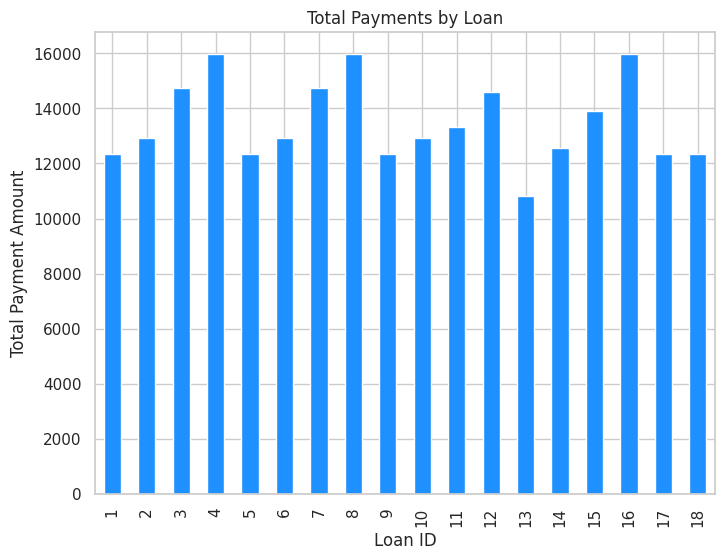

In [ ]:

# Summing payments by Loan ID
loan_payment_summary = consolidated_schedule_df.groupby('Loan ID')['Total Payment'].sum()

plt.figure(figsize=(8, 6))
loan_payment_summary.plot(kind='bar', color='dodgerblue')
plt.title('Total Payments by Loan')
plt.xlabel('Loan ID')
plt.ylabel('Total Payment Amount')
plt.show()


### Fig 6.2. Interest vs. Principal Payment Over Time:

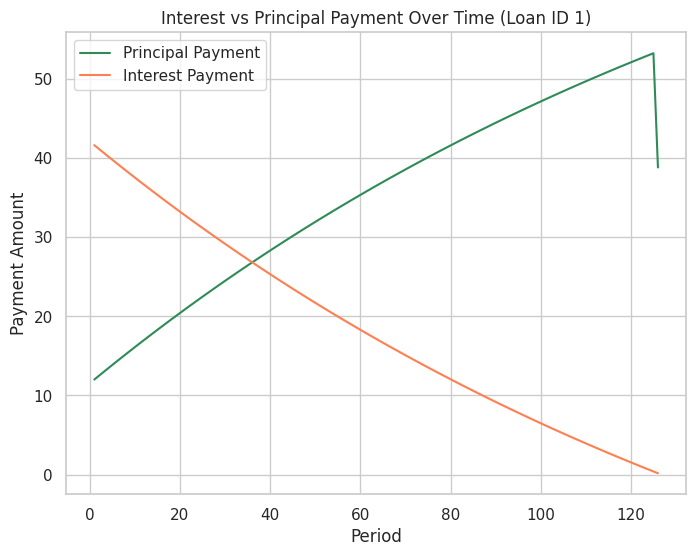

In [ ]:
# Interest and Principal over Time for a Sample Loan
sample_loan_id = 1  # Choose a sample loan to visualize
sample_schedule = consolidated_schedule_df[consolidated_schedule_df['Loan ID'] == sample_loan_id]

plt.figure(figsize=(8, 6))
plt.plot(sample_schedule['Period'], sample_schedule['Principal Payment'], label='Principal Payment', color='seagreen')
plt.plot(sample_schedule['Period'], sample_schedule['Interest Payment'], label='Interest Payment', color='coral')
plt.title(f'Interest vs Principal Payment Over Time (Loan ID {sample_loan_id})')
plt.xlabel('Period')
plt.ylabel('Payment Amount')
plt.legend()
plt.show()


## Conclusion
This project generated detailed amortization schedules for a set of loans, including periodic principal and interest payments as well as optional prepayments. The analysis and visualizations provided insights into cash flows over time and allowed us to observe trends in loan repayment.

### Key Insights:
1. **Interest Payments Over Time**: Interest payments decrease as the principal balance reduces.
2. **Prepayments Impact**: Loans with prepayments achieve a lower balance faster, reducing the interest paid over time.
3. **Consolidated Cash Flow**: The total cash flow for all loans combined offers a clear view of the overall financial commitment.

This analysis can be extended to explore scenarios with different prepayment rates or varying payment frequencies, offering a flexible tool for understanding loan behaviors and their financial impact.
